In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

np.set_printoptions(formatter={'all':lambda x: str(x)})

In [8]:
spi_total = np.loadtxt("spiral_xp_plt.csv",
                 delimiter=",")


In [3]:
simple_total = np.loadtxt("simple_data.csv",
                 delimiter=",")

In [4]:
double_total = np.loadtxt("double_data.csv",
                 delimiter=",")

In [11]:
#fix DB size 
for i in range (14,23):
    fixed_db = spi_total[np.where(spi_total[:,0] == 2^i)]
    name = 'spiral_{}.csv'.format(i)

    with open(name, 'w') as f:
    # create the csv writer
        writer = csv.writer(f)
    # write a row to the csv file
        for row in fixed_db:
            writer.writerow(row)






## Hint: Fixing the record size and varying the DB size

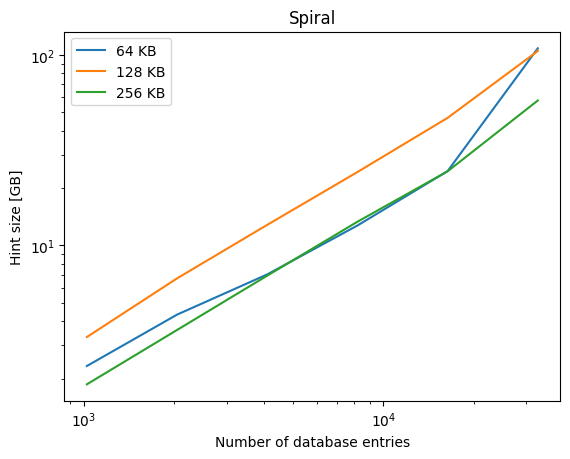

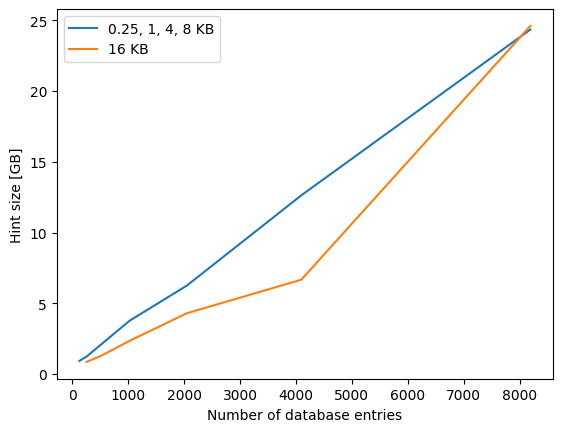

In [22]:

from matplotlib.ticker import LogLocator
import math
def log_2(x):
    return math.log2(x).astype(float)

def inv(x):
    return 2**x
power_rng= ['$2^14$','$2^14$','$2^14$','$2^14$','$2^14$','$2^14$','$2^14$']

for i in [64,128,256]:
    #hint 
    mine = spi_total[np.where(spi_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]
    total_size = sorted_spi[:,2] #MB
    hint = sorted_spi[:,5]/1024**2 #GB
    name = '{} KB'.format(i)
    # fig, ax = plt.subplots()
    # plt.xticks(total_size)
    # We need to draw the canvas, otherwise the labels won't be positioned and 
    # won't have values yet.
    # fig.canvas.draw()
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels = "hello"
    # ax.set_xticklabels(power_rng)
    # ax.xaxis.set_major_locator(LogLocator(base=2))
    plt.plot(total_size, hint, label = name)
plt.legend()
plt.title("Spiral")
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of database entries")
plt.ylabel("Hint size [GB]")

plt.show()



mine = spi_total[np.where(spi_total[:,1] == 8)]
sorted_spi = mine[mine[:, 2].argsort()]
total_size = sorted_spi[:,2] #MB
hint = sorted_spi[:,5]/1024**2 #GB
name = '0.25, 1, 4, 8 KB'.format(i)
plt.plot(total_size, hint, label = name, color = 'violet')
# fig, ax = plt.subplots()
# plt.xticks(total_size)
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
# fig.canvas.draw()
# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels = "hello"
# ax.set_xticklabels(power_rng)
# ax.xaxis.set_major_locator(LogLocator(base=2))
mine = spi_total[np.where(spi_total[:,1] == 16)]
sorted_spi = mine[mine[:, 2].argsort()]
total_size = sorted_spi[:,2] #MB
hint = sorted_spi[:,5]/1024**2 #GB
name = '16 KB'.format(i)
plt.plot(total_size, hint, label = name,color = 'red')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel("Number of database entries")
plt.ylabel("Hint size [GB]")

plt.show()



# plt.yscale('log')
# plt.xscale('log')


   

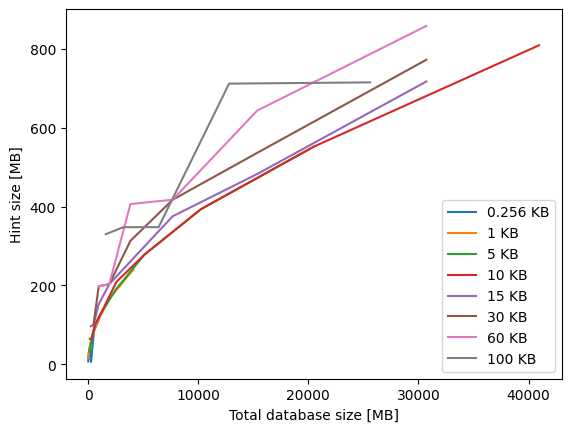

In [189]:
#simple
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = simple_total[np.where(simple_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/1024

    hint = sorted_spi[:,5]/1024
    name = '{} KB'.format(i)
    plt.plot(total_size, hint, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Hint size [MB]")
plt.show()


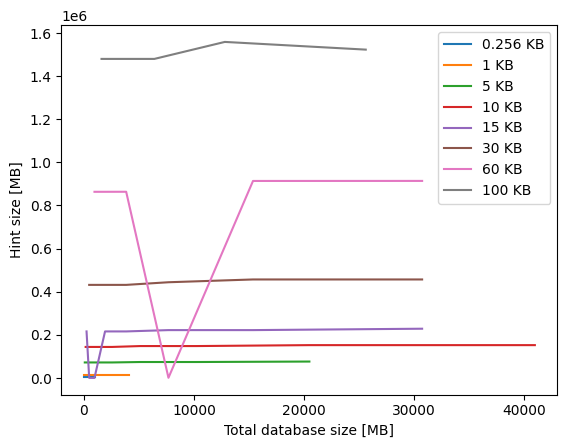

In [191]:
#double

#fix record size 
for i in [0.256,1,5,10,15,30,60,100]:
    #hint 
    mine = double_total[np.where(double_total[:,1] == i)]
    sorted_spi = mine[mine[:, 2].argsort()]

    total_size = mine[:,2]/(1024)

    hint = mine[:,5]/(1024)
    name = '{} KB'.format(i)
    plt.plot(total_size, hint, label = name)
plt.legend()
plt.xlabel("Total database size [MB]")
plt.ylabel("Hint size [MB]")
plt.show()

## Fixing th DB size

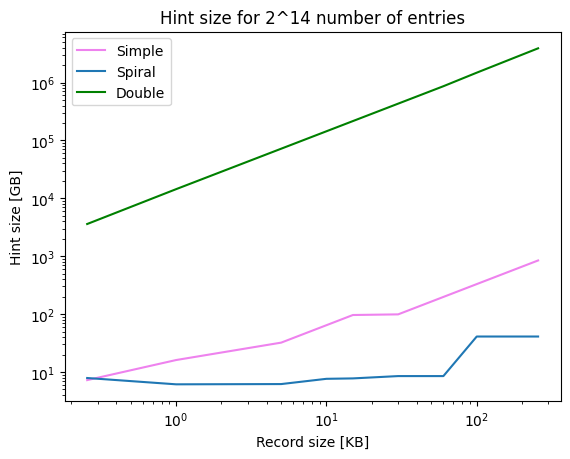

In [55]:
#spiral+double+simple 2^14

mine = simple_total[np.where(simple_total[:,0] == 16384)]
hint_simp =  mine[:,5]/1024
# total_size = mine[:,2]/(1024**2)
# rec_size = np.multiply([0.256,1,5,10,15,30,60,100,256],1024)
rec_size = [0.256,1,5,10,15,30,60,100,256]

plt.plot(rec_size, hint_simp,label =  'Simple', color ='violet')

mine = spi_total[np.where(spi_total[:,0 ] == 16384)]
hint =mine[:,7]/1024
plt.plot(rec_size, hint,label = 'Spiral')

mine = double_total[np.where(double_total[:,0] == 16384)]
hint = mine[:,5]/1024 #KB
#ax.set_yscale('log', basey=2)

plt.plot(rec_size, hint, label =  'Double',  color ='green')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.xlabel("Record size [KB]")
plt.ylabel("Hint size [GB]")
plt.title("Hint size for 2^14 number of entries")
plt.show()

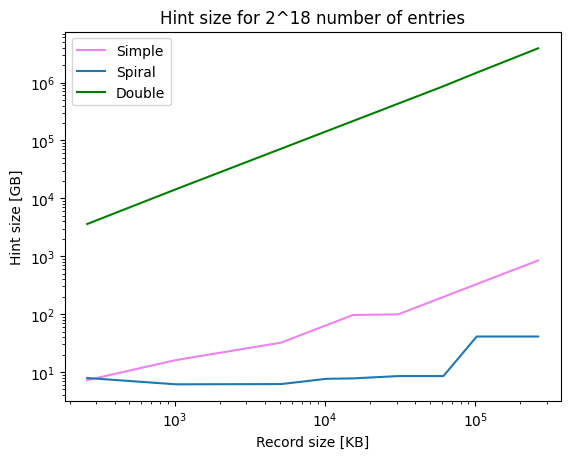

In [56]:
#spiral+double+simple 2^18

mine = simple_total[np.where(simple_total[:,0] == 16384)]
hint_simp =  mine[:,5]/1024
# total_size = mine[:,2]/(1024**2)
rec_size = np.multiply([0.256,1,5,10,15,30,60,100,256],1024)
plt.plot(rec_size, hint_simp,label =  'Simple', color ='violet')


mine = spi_total[np.where(spi_total[:,0 ] == 16384)]
hint =mine[:,7]/1024
plt.plot(rec_size, hint,label = 'Spiral')

mine = double_total[np.where(double_total[:,0] == 16384)]
hint = mine[:,5]/1024 #KB
# ax.set_yscale('log', basey=2)
plt.plot(rec_size, hint, label =  'Double',  color ='green')
plt.xscale('log', base=10)
plt.yscale('log', base=10)

plt.legend()
plt.xlabel("Record size [KB]")
plt.ylabel("Hint size [GB]")
plt.title("Hint size for 2^18 number of entries")
plt.show()

In [23]:
#spiral+double+simple 2^20

mine = simple_total[np.where(simple_total[:,0] == 1048576)]
hint_simp =  mine[:,5]/1024
# total_size = mine[:,2]/(1024**2)
rec_size = np.multiply([0.256,1,5,10,15,30,60,100,256],1024)
plt.plot(rec_size, hint_simp,label =  'Simple', color ='violet')


mine = spi_total[np.where(spi_total[:,0 ] == 16384)]
hint =mine[:,7]/1024
plt.plot(rec_size, hint,label = 'Spiral')

mine = double_total[np.where(double_total[:,0] == 16384)]
hint = mine[:,5]/1024 #KB
# ax.set_yscale('log', basey=2)
plt.plot(rec_size, hint, label =  'Double',  color ='green')
plt.xscale('log', base=10)
plt.yscale('log', base=10)

plt.legend()
plt.xlabel("Record size [KB]")
plt.ylabel("Hint size [GB]")
plt.title("Hint size for 2^20 number of entries")
plt.show()

NameError: name 'simple_total' is not defined

## Fixing the total DB size and vary the record size

[4.0 8.0 16.0 32.0 64.0 128.0 256.0]


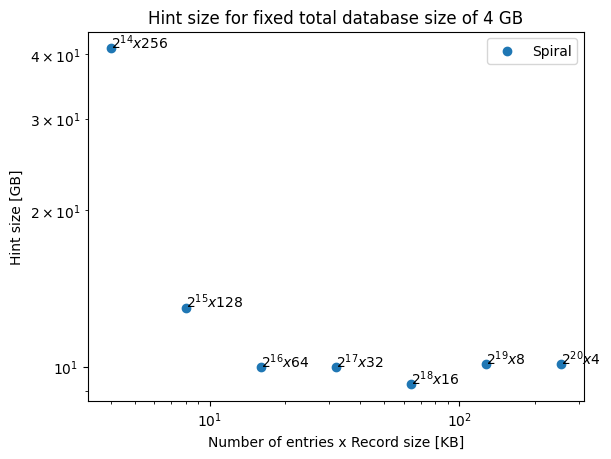

In [22]:
#spiral+double+simple 2^18

# mine = simple_total[np.where(simple_total[:,2] == 4096)] ## change this
# hint_simp =  mine[:,7]/1024
# # total_size = mine[:,2]/(1024**2)
# rec_size = np.multiply([0.256,1,5,10,15,30,60,100,256],1024)
# plt.plot(rec_size, hint_simp,label =  'Simple', color ='violet')


mine = spi_total[np.where(spi_total[:,2 ] == 4096)]
mine = mine[mine[:, 0].argsort()]
rec_size = np.unique(mine[:,1 ])
print(rec_size)
hint =mine[:,7]/1024
plt.scatter(rec_size, hint,label = 'Spiral')

for i, txt in enumerate(['$2^{14} x 256$', '$2^{15} x 128$','$2^{16} x 64$','$2^{17} x 32$','$2^{18}x16$','$2^{19}x8$','$2^{20}x4$']):
    plt.annotate(txt, (rec_size[i], hint[i]))

# mine = double_total[np.where(double_total[:,0] == 245760)]
# hint = mine[:,5]/1024 #KB
# # ax.set_yscale('log', basey=2)
# plt.plot(rec_size, hint, label =  'Double',  color ='green')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.legend()
plt.xlabel("Number of entries x Record size [KB]")
plt.ylabel("Hint size [GB]")
plt.title("Hint size for fixed total database size of 4 GB")
plt.show()


#for 2^14, t_conv is much bigget (=32 vs 4-8). nu1 and nu2 change. 
